In [209]:
from pandas import  *
from seaborn import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

ONLY TAKE ROOMS(RM) AS INPUT TO PREDICT HOUSE PRICE

In [210]:
df=read_csv('boston_houses.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [211]:
x=(df[['RM']])
y=(df[['Price']])

In [212]:
r=LinearRegression()
r.fit(x,y)
r.score(x,y)

0.48352545599133423

In [213]:
r.predict([[6.5]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[24.4930876]])

In [214]:
r2=PolynomialFeatures(degree=5)# degree=2 is best for lower milage(calculated)
x2=r2.fit_transform(x)     #degree 5 is best gor higher milage

In [215]:
l=LinearRegression()
l.fit(x2,y)


LinearRegression()

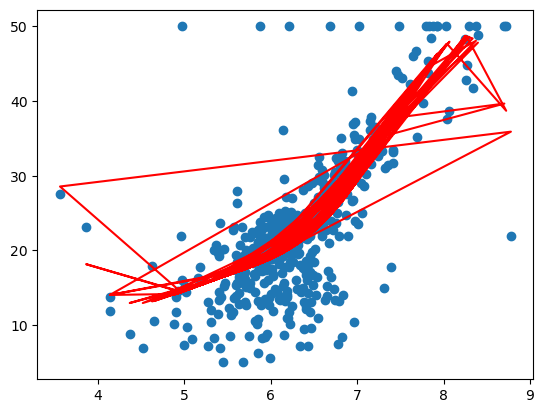

In [216]:
scatter(x,y)
plot(x,l.predict(r2.fit_transform(x)),color="red")

In [217]:
l.score(x2,y)

0.5903665905774418

In [218]:
l.predict(r2.fit_transform([[6.5]]))

array([[22.60152785]])

CAN'T USE POLYNOMIAL REG. USE TRAIN,TEST SPLIT

In [219]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [220]:
r=LinearRegression()
r.fit(x_train,y_train)

LinearRegression()

In [221]:
r.score(x_test,y_test)

0.3581009134356232

In [222]:
r.score(x_train,y_train)

0.5106487177355191

In [223]:
r.predict([[6.5]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[24.39024591]])

In [224]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
